In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acovf, acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

# Zadanie 1


In [2]:
df1 = pd.read_csv("archiwum_tab_a_2025.csv", encoding='Latin2', sep=';')

In [ ]:
df2 = pd.read_csv("archiwum_tab_a_2024.csv", encoding='Latin2', sep=';')

In [27]:
df = pd.read_csv("archiwum_tab_a_2024.csv", encoding='Latin2', sep=';')

In [28]:
df = df.iloc[1:-3]

In [4]:
df2 = df2.iloc[1:-3]
df1 = df1.iloc[1:-3]

In [5]:
df = pd.concat([df2, df1])

In [6]:
df

,data,1THB,1USD,1AUD,1HKD,1CAD,1NZD,1SGD,1EUR,100HUF,...,1BRL,1MYR,10000IDR,100INR,100KRW,1CNY,1XDR,nr tabeli,pełny numer tabeli,Unnamed: 36
1,20240102,"0,1155","3,9432","2,6897","0,5046","2,9752","2,4884","2,9809","4,3434","1,1365",...,"0,8125","0,8567","2,5489","4,7327","0,3032","0,5525","5,2882",1.0,001/A/NBP/2024,NaN
2,20240103,"0,1162","3,9909","2,6932","0,5112","2,9947","2,4961","3,0074","4,3646","1,1462",...,"0,8105","0,8618","2,5781","4,7914","0,3050","0,5585","5,3351",2.0,002/A/NBP/2024,NaN
3,20240104,"0,1152","3,9684","2,6760","0,5083","2,9785","2,4849","2,9900","4,3525","1,1468",...,"0,8065","0,8563","2,5619","4,7676","0,3036","0,5552","5,3260",3.0,003/A/NBP/2024,NaN
4,20240105,"0,1148","3,9850","2,6627","0,5101","2,9797","2,4778","2,9925","4,3484","1,1498",...,"0,8136","0,8562","2,5682","4,7907","0,3023","0,5569","5,3070",4.0,004/A/NBP/2024,NaN
5,20240108,"0,1137","3,9812","2,6668","0,5099","2,9761","2,4819","2,9922","4,3548","1,1528",...,"0,8167","0,8560","2,5644","4,7886","0,3020","0,5559","5,3215",5.0,005/A/NBP/2024,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,20250331,"0,1139","3,8643","2,4180","0,4967","2,6932","2,1983","2,8810","4,1839","1,0410",...,"0,6710","0,8708","2,3335","4,5223","0,2623","0,5328","5,1369",62.0,062/A/NBP/2025,NaN
63,20250401,"0,1133","3,8656","2,4186","0,4968","2,6879","2,1953","2,8799","4,1818","1,0379",...,"0,6781","0,8711","2,3343","4,5173","0,2627","0,5318","5,1376",63.0,063/A/NBP/2025,NaN
64,20250402,"0,1133","3,8707","2,4412","0,4974","2,7063","2,2218","2,8813","4,1794","1,0421",...,"0,6812","0,8692","2,3374","4,5211","0,2646","0,5323","5,1419",64.0,064/A/NBP/2025,NaN
65,20250403,"0,1108","3,7968","2,4052","0,4879","2,6866","2,2003","2,8370","4,1791","1,0432",...,"0,6701","0,8524","2,2927","4,4396","0,2606","0,5200","5,1346",65.0,065/A/NBP/2025,NaN


In [29]:
df = df[["data", "1USD", "1EUR"]]

In [30]:
df.columns = ["date", "USD", "EUR"]

In [31]:
df["date"] = pd.to_datetime(df["date"], format="%Y%m%d")


In [32]:
df["date"].isna().sum()

np.int64(0)

In [33]:
df["USD"] = df["USD"].str.replace(",", ".").astype(float)
df["EUR"] = df["EUR"].str.replace(",", ".").astype(float)


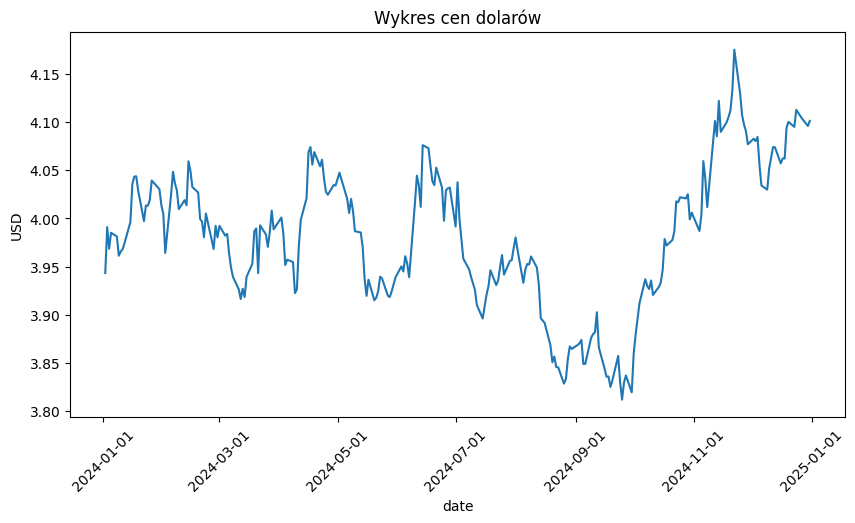

In [34]:
import matplotlib.dates as mdates
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="date", y="USD")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.title("Wykres cen dolarów")
plt.show()

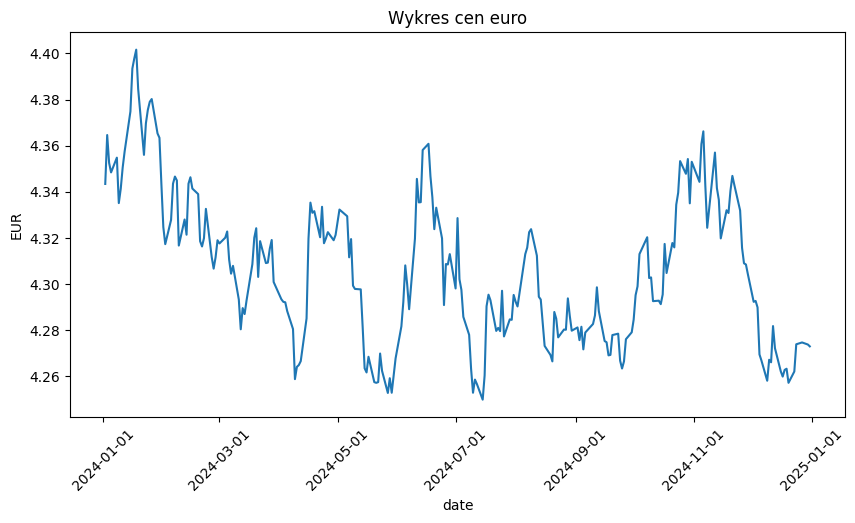

In [35]:
import matplotlib.dates as mdates
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="date", y="EUR")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.title("Wykres cen euro")
plt.show()

In [38]:
df["returns_USD"] = np.log(1 + df["USD"].pct_change())
df["returns_EUR"] = np.log(1 + df["EUR"].pct_change())

In [39]:
df.dropna(inplace=True)

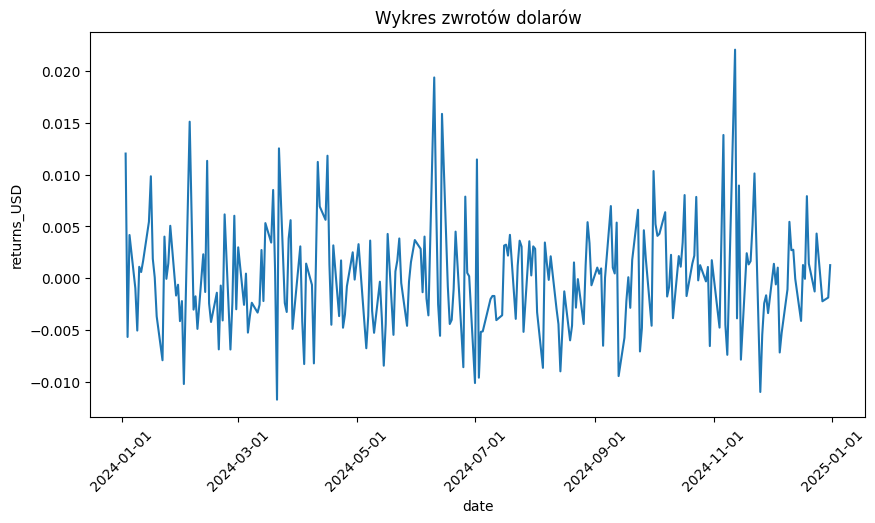

In [40]:
import matplotlib.dates as mdates
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="date", y="returns_USD")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.title("Wykres zwrotów dolarów")
plt.show()

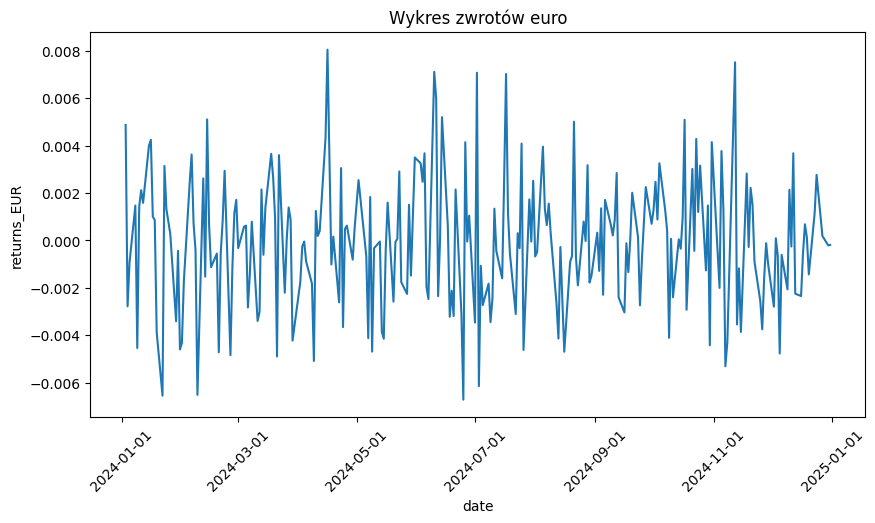

In [41]:

plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="date", y="returns_EUR")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.title("Wykres zwrotów euro")
plt.show()


Odchylenie standardowe

In [42]:
usd_std = df["returns_USD"].std()
eur_std = df["returns_EUR"].std()
print(usd_std, eur_std)

0.005295166530142576 0.002755891305820713


Wariancja

In [43]:
usd_var = df["returns_USD"].var()
eur_var = df["returns_EUR"].var()
print(usd_var, eur_var)

2.8038788581942166e-05 7.594936889498194e-06


Annualizowane odchylenie standardowe

In [54]:
annualized_usd_std = usd_std * np.sqrt(252) * 100
annualized_eur_std = eur_std * np.sqrt(252) * 100
print(f"Annualizowane std USD: {annualized_usd_std:.2f}%\nAnnualizowane std EUR: {annualized_eur_std:.2f}%")

Annualizowane std USD: 8.41%
Annualizowane std EUR: 4.37%


Średnie

In [50]:
usd_mean = df["returns_USD"].mean()
eur_mean = df["returns_EUR"].mean()
print(usd_mean, eur_mean)

0.0001565220613735748 -6.510476049053974e-05


Semi std

In [55]:
below_mean_usd = df[df['returns_USD'] < usd_mean]
below_mean_eur = df[df['returns_EUR'] < eur_mean]

semi_std_usd = np.std(below_mean_usd['returns_USD'], ddof=1) * 100
semi_std_eur = np.std(below_mean_eur['returns_EUR'], ddof=1) * 100

print(f"Semi std USD: {semi_std_usd:.2f}%\nSemi std EUR: {semi_std_eur:.2f}%")

Semi std USD: 0.27%
Semi std EUR: 0.17%


IQR

In [59]:
iqr_usd = df["returns_USD"].quantile(0.75) - df["returns_USD"].quantile(0.25)
iqr_eur = df["returns_EUR"].quantile(0.75) - df["returns_EUR"].quantile(0.25)

In [60]:
print(iqr_usd, iqr_eur)

0.006770388322919013 0.0034055934388662473


Dekompozycja - nie trzeba stacjonarne

In [66]:
def adfuller_test(series, sig = 0.05):
    res = adfuller(series, autolag='AIC')    
    p_value = round(res[1], 3) 
    stats   = round(res[0], 3) 

    if p_value <= sig:
        print(f"Statystyka testowa = {stats}, p-Value = {p_value} => Stationary. ")
    else:
        print(f"Statystyka testowa = {stats}, p-value = {p_value} => Non-stationary.")

In [68]:
adfuller_test(df["returns_USD"])
adfuller_test(df["returns_EUR"])

Statystyka testowa = -16.901, p-Value = 0.0 => Stationary. 
Statystyka testowa = -16.036, p-Value = 0.0 => Stationary. 


Histogramy

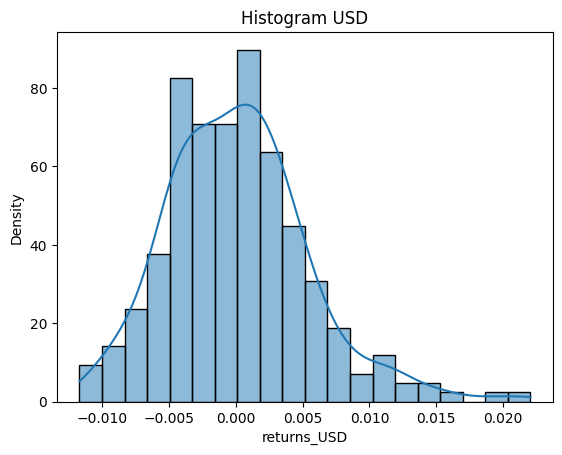

In [73]:
sns.histplot(data=df, x="returns_USD", stat="density",kde = True, bins=20)
plt.title("Histogram USD")
plt.show()

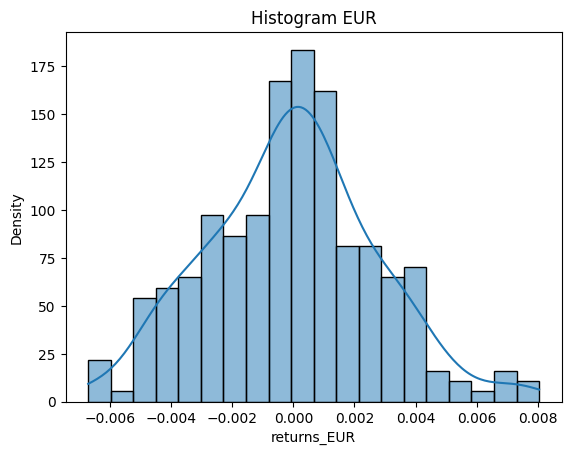

In [74]:
sns.histplot(data=df, x="returns_EUR", stat="density",kde = True, bins=20)
plt.title("Histogram EUR")
plt.show()

Kwantyle

In [75]:
quantiles = [0.05, 0.5, 0.95, 0.975]
result = df[["returns_USD", "returns_EUR"]].quantile(q=quantiles)
result = result.T
result.columns = [f"Q{int(q*1000)/10}" for q in quantiles]
print(result)


                 Q5.0     Q50.0     Q95.0     Q97.5
returns_USD -0.007871 -0.000050  0.009973  0.011973
returns_EUR -0.004606 -0.000046  0.004260  0.005175


Dystrybuanty

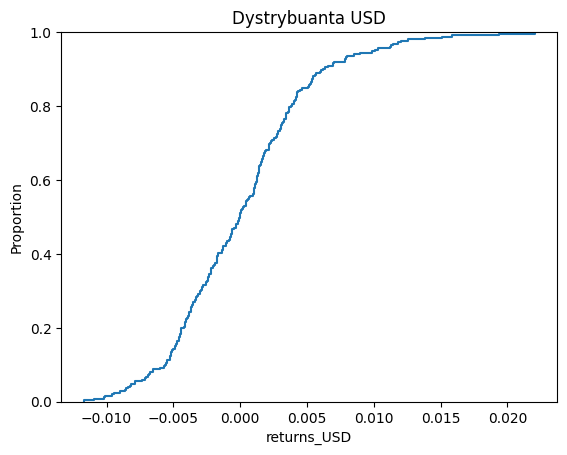

In [76]:
sns.ecdfplot(data=df, x="returns_USD")
plt.title("Dystrybuanta USD")
plt.show()

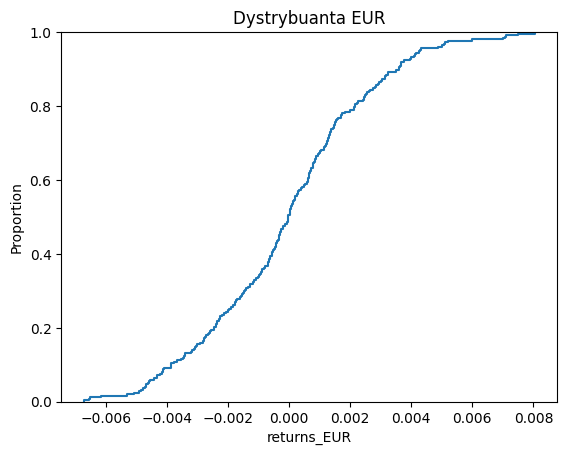

In [77]:
sns.ecdfplot(data=df, x="returns_EUR")
plt.title("Dystrybuanta EUR")
plt.show()

# Zadanie 2

Wagi portfolio - proporcjonalne do zmienności, risk-parity light

In [80]:
inv_vol_usd = 1 / usd_std
inv_vol_eur = 1 / eur_std

w_usd = inv_vol_usd / (inv_vol_usd + inv_vol_eur)
w_eur = inv_vol_eur / (inv_vol_usd + inv_vol_eur)

In [81]:
print(w_usd, w_eur)

0.34230176480790087 0.6576982351920992


Portfel

In [82]:
df["portfolio"] = w_usd * df["returns_USD"] + w_eur * df["returns_EUR"]


Macierz korelacji

In [85]:
df[["returns_USD", "returns_EUR", "portfolio"]].corr()

,returns_USD,returns_EUR,portfolio
returns_USD,1.000000,0.723848,0.928399
returns_EUR,0.723848,1.000000,0.928399
portfolio,0.928399,0.928399,1.000000


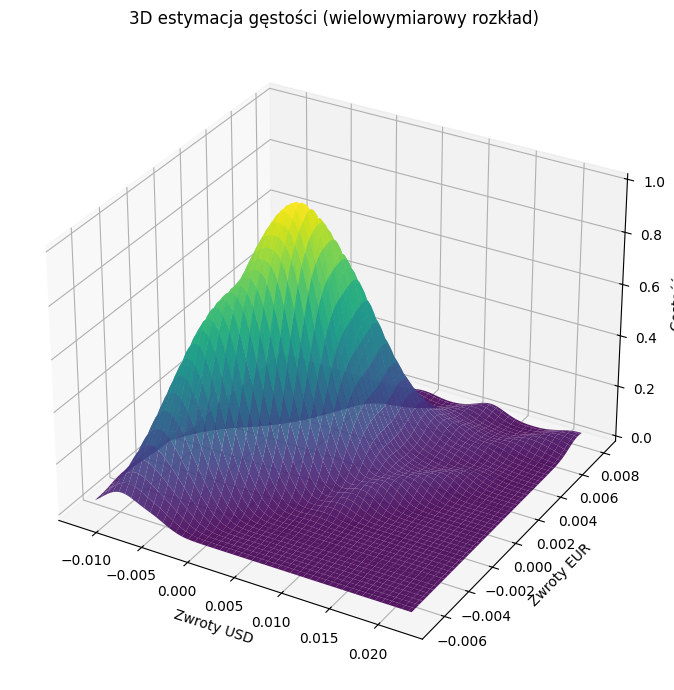

In [ ]:
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D

X = df[["returns_USD", "returns_EUR"]].dropna().to_numpy().T

kde = gaussian_kde(X)

x_min, x_max = df["returns_USD"].min(), df["returns_USD"].max()
y_min, y_max = df["returns_EUR"].min(), df["returns_EUR"].max()

x, y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
positions = np.vstack([x.ravel(), y.ravel()])

z = kde(positions).reshape(x.shape)
z = z / z.max()

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none', alpha=0.9)

ax.set_xlabel("Zwroty USD")
ax.set_ylabel("Zwroty EUR")
ax.set_zlabel("Gęstość")
ax.set_title("3D estymacja gęstości (wielowymiarowy rozkład)")

plt.tight_layout()
plt.show()
